Importing the libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np




Importing the open source online retail dataset

In [16]:
df=pd.read_csv('C:\\Users\\lucky\\Downloads\\Customer_Segmentation\\reatil.csv',encoding= "utf-16 LE")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


Checking the countries for which the dataset is available

In [17]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Choosing to analyse the customer segmentation for the Switzerland and Norway

Extracting the data for Switzerland from the main dataset

In [18]:
df_swiss=df.loc[df['Country'] == 'Switzerland']
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,12/03/2010 10:36:00,2.95,13520.0,Switzerland
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,12/03/2010 10:36:00,1.65,13520.0,Switzerland
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/03/2010 10:36:00,1.65,13520.0,Switzerland
5323,536858,20677,PINK POLKADOT BOWL,16,12/03/2010 10:36:00,1.25,13520.0,Switzerland
5324,536858,20750,RED RETROSPOT MINI CASES,2,12/03/2010 10:36:00,7.95,13520.0,Switzerland


Converting Invoice Dates to date time format and making a new column named Amount which tells the total money spent on that invoice

In [19]:
df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce') 
df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["UnitPrice"]
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,2010-12-03 10:36:00,2.95,13520.0,Switzerland,88.5
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,2010-12-03 10:36:00,1.65,13520.0,Switzerland,59.4
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-03 10:36:00,1.65,13520.0,Switzerland,39.6
5323,536858,20677,PINK POLKADOT BOWL,16,2010-12-03 10:36:00,1.25,13520.0,Switzerland,20.0
5324,536858,20750,RED RETROSPOT MINI CASES,2,2010-12-03 10:36:00,7.95,13520.0,Switzerland,15.9


Checking the start and end date of the Switzerland dataframe

In [20]:
print('Min{};Max{}'.format(min(df_swiss.InvoiceDate),max(df_swiss.InvoiceDate)))

Min2010-12-03 10:36:00;Max2011-11-29 08:40:00


Creating a Snapshot date which would count the number of days since the Invoice date to a hypothetical date for analysis of the particular customer and add 1 to it so that the initial date is not 0. This would calculate the "Recency"

In [21]:
snapshot_date=max(df_swiss.InvoiceDate)+ datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-11-30 08:40:00')

Making a new dataframe which depicts the Recency. This is a measure that shows the number of days passed since the last purchase.

In [22]:
recency_df = df_swiss.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (snapshot_date - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12357.0,23
1,12371.0,34
2,12377.0,305
3,12378.0,119
4,12384.0,19


Making a new dataframe which depicts the Frequency. This is a measure of the number of purchases

In [23]:
frequency_df = df_swiss.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12357.0,131
1,12371.0,63
2,12377.0,77
3,12378.0,219
4,12384.0,30


Making a new dataframe named Monetary which depicts the total monetary value spent by the customer.

In [26]:
monetary_df = df_swiss.groupby(by='CustomerID',as_index=False).agg({'Amount':'sum'})
monetary_df=monetary_df[['Amount']]
monetary_df.head()

,Amount
0,6207.67
1,1887.96
2,1628.12
3,4008.62
4,566.16


Merging the three dataframes

In [69]:
print(temp_df.columns)
print(monetary_df.columns)

#.................................
temp_df = recency_df.merge(frequency_df,on='CustomerID')

rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.rename(columns = {'Recency': 'Recency','Frequency': 'Frequency',('Amount', 'Amount'): 'Monetary'}, inplace=True)
rfm_df.head()



Index(['CustomerID', 'Recency', 'Frequency'], dtype='object')
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


,Recency,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,,,
12357.0,23,131,574740,22064,PINK DOUGHNUT TRINKET POT,12,11/06/2011 16:07:00,1.65,Switzerland
12357.0,23,131,574740,21232,STRAWBERRY CERAMIC TRINKET POT,12,11/06/2011 16:07:00,1.25,Switzerland
12357.0,23,131,574740,22066,LOVE HEART TRINKET POT,48,11/06/2011 16:07:00,0.39,Switzerland
12357.0,23,131,574740,22067,CHOC TRUFFLE GOLD TRINKET POT,12,11/06/2011 16:07:00,1.65,Switzerland
12357.0,23,131,574740,21555,CERAMIC STRAWBERRY TRINKET TRAY,6,11/06/2011 16:07:00,2.55,Switzerland


## K-Means Clustering

Using the Elbow Method to determine the right amount of clusters that can be formed for the given dataframe using the sum of square error

Index(['Recency', 'Frequency', 'InvoiceNo', 'StockCode', 'Description',
       'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'],
      dtype='object')


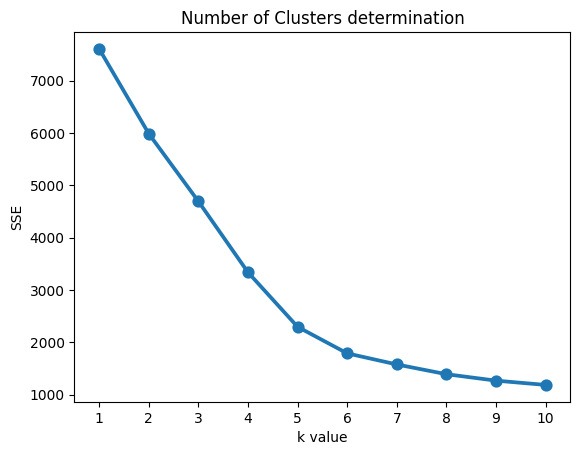

"\nsse = {}\nfor k in range(1, 11):\n    kmeans = KMeans(n_clusters=k, random_state=40)\n    kmeans.fit(rfm_df)\n    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid\nplt.title('Number of Clusters determination')\nplt.xlabel('k value')\nplt.ylabel('SSE')\nsns.pointplot(x=list(sse.keys()), y=list(sse.values()))\nplt.show()"

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming rfm_df is already defined and contains the necessary data

# Check the columns in rfm_df
print(rfm_df.columns)

# If 'CustomerID' is not present, ensure you are using the correct DataFrame
# Exclude non-numeric columns if necessary
rfm_df_numeric = rfm_df.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df_numeric)

# Elbow method to determine the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(rfm_df_scaled)
    sse[k] = kmeans.inertia_  # SSE to closest cluster centroid

plt.title('Number of Clusters determination')
plt.xlabel('k value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

'''
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(rfm_df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('Number of Clusters determination')
plt.xlabel('k value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()'''

Number of clusters=3

Fitting the model on the dataset

In [82]:


# Exclude non-numeric columns
rfm_df_numeric = rfm_df.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df_numeric)

# Fit the KMeans model
model = KMeans(n_clusters=3, random_state=40)
model.fit(rfm_df_scaled)

# Print cluster centers
print("Cluster Centers:\n", model.cluster_centers_)

'''model = KMeans(n_clusters=3, random_state=40)
model.fit(rfm_df)'''

Cluster Centers:
 [[ 2.41581121 -1.03735079 -0.19687097  0.09283905]
 [-0.12508983 -0.29202674 -0.01351016  0.0365305 ]
 [-0.92028351  1.69655264  0.16421957 -0.19096315]]


'model = KMeans(n_clusters=3, random_state=40)\nmodel.fit(rfm_df)'

Assigning clusters

In [83]:
rfm_df["Cluster"] = model.labels_
rfm_df.head()

,Recency,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cluster
CustomerID,,,,,,,,,,
12357.0,23,131,574740,22064,PINK DOUGHNUT TRINKET POT,12,11/06/2011 16:07:00,1.65,Switzerland,1
12357.0,23,131,574740,21232,STRAWBERRY CERAMIC TRINKET POT,12,11/06/2011 16:07:00,1.25,Switzerland,1
12357.0,23,131,574740,22066,LOVE HEART TRINKET POT,48,11/06/2011 16:07:00,0.39,Switzerland,1
12357.0,23,131,574740,22067,CHOC TRUFFLE GOLD TRINKET POT,12,11/06/2011 16:07:00,1.65,Switzerland,1
12357.0,23,131,574740,21555,CERAMIC STRAWBERRY TRINKET TRAY,6,11/06/2011 16:07:00,2.55,Switzerland,1


Counting number of customers in each cluster

In [88]:

# Assuming rfm_df is already defined and contains the necessary data

# Calculate the Monetary value
rfm_df['Monetary'] = rfm_df['UnitPrice'] * rfm_df['Quantity']

# Check the columns in rfm_df
print(rfm_df.columns)

# Exclude non-numeric columns
rfm_df_numeric = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df_numeric)

# Fit the KMeans model
model = KMeans(n_clusters=3, random_state=40)
rfm_df['Cluster'] = model.fit_predict(rfm_df_scaled)

# Group by Cluster and aggregate
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print(cluster_summary)


#.,...................
'''rfm_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)'''

Index(['Recency', 'Frequency', 'InvoiceNo', 'StockCode', 'Description',
       'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Cluster',
       'Monetary'],
      dtype='object')
        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         254.7      50.2     24.6   205
1          61.8     133.2     31.6  1341
2           1.0     355.0     25.2   355


"rfm_df.groupby('Cluster').agg({\n    'Recency':'mean',\n    'Frequency':'mean',\n    'Monetary':['mean', 'count']}).round(1)"

Normalizing the data

In [90]:
df_rfm = pd.DataFrame(rfm_df, columns=['Recency', 'Frequency', 'Monetary'])
df_rfm['ID'] = rfm_df.index
df_rfm['Cluster'] = model.labels_
df_rfm.head()

,Recency,Frequency,Monetary,ID,Cluster
CustomerID,,,,,
12357.0,23,131,19.80,12357.0,1
12357.0,23,131,15.00,12357.0,1
12357.0,23,131,18.72,12357.0,1
12357.0,23,131,19.80,12357.0,1
12357.0,23,131,15.30,12357.0,1


Preparing the data for visualisation using a snake plot

In [91]:
rfm = pd.melt(df_rfm.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm.head()

,ID,Cluster,Attribute,Value
0,12357.0,1,Recency,23.0
1,12357.0,1,Recency,23.0
2,12357.0,1,Recency,23.0
3,12357.0,1,Recency,23.0
4,12357.0,1,Recency,23.0


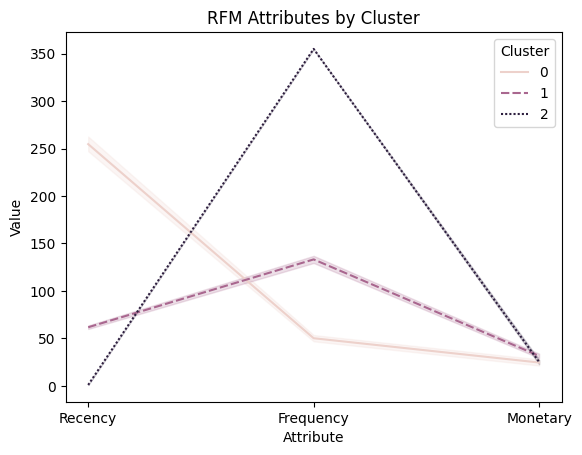

In [93]:
#sns.lineplot('Attribute', 'Value',style='Cluster', data=rfm)


# Assuming rfm_df is already defined and contains the necessary data

# Melt the DataFrame to long format
rfm_melted = rfm_df.melt(id_vars=['Cluster'], value_vars=['Recency', 'Frequency', 'Monetary'], 
                         var_name='Attribute', value_name='Value')

# Create the line plot
sns.lineplot(x='Attribute', y='Value', hue='Cluster', style='Cluster', data=rfm_melted)

plt.title('RFM Attributes by Cluster')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.show()


Cluster 1: Best customers

Cluster 2: Lost customers

Cluster 0: Potential customers

In [94]:
df_rfm=df_rfm.reset_index()
df_rfm=df_rfm.reset_index()
df_rfm.head()

,index,CustomerID,Recency,Frequency,Monetary,ID,Cluster
0,0,12357.0,23,131,19.80,12357.0,1
1,1,12357.0,23,131,15.00,12357.0,1
2,2,12357.0,23,131,18.72,12357.0,1
3,3,12357.0,23,131,19.80,12357.0,1
4,4,12357.0,23,131,15.30,12357.0,1


Dot plot for cluster visualization

In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_rfm['index'], y=df_rfm['Cluster'],
                    mode='markers',
                    marker_color=df_rfm['Cluster'],
                    marker_size=16,
                    text=df_rfm['Cluster'],
                    )),
fig.update_yaxes(nticks=3)
fig.update_xaxes(nticks=20)
fig.update_layout(
    title="Customer clusters",
    xaxis_title="Customer ID(ref)",
    yaxis_title="Cluster",
    legend_title="Legend Title",
    autosize=False,width=500,height=400,
    font=dict(
        size=15),
    plot_bgcolor='#DDCFF4'
    
)
import plotly.io as pio



# Set Plotly renderer to 'browser' or 'notebook'
pio.renderers.default = 'browser'  # This opens the plot in a new browser tab

fig.show()
#..............
